In [133]:

import pandas as pd
import numpy as np
from sklearn import tree, preprocessing

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
def processData(filename):
  # Create a function to preprocess input data and remove irrelevant features
  df2007 = pd.read_csv(filename, encoding="utf8")
  df2007['month'] = pd.DatetimeIndex(df2007['Date Local']).month
  df2007['day'] = pd.DatetimeIndex(df2007['Date Local']).day
  df2007['year'] = pd.DatetimeIndex(df2007['Date Local']).year
  df2007 = df2007.drop(columns=['Observation Percent'])
  df2007['State Code'] = pd.to_numeric(df2007['State Code'])
  df2007 = df2007.drop(columns='Method Code')
  df2007 = df2007.dropna()
  df2007 = df2007.drop_duplicates()
  le = preprocessing.LabelEncoder()
  df2007['Event Type'] = le.fit_transform(df2007['Event Type'])
  df2007 = df2007.select_dtypes(exclude=['object'])
  return df2007

**Read predicted data for all pollutants - CO, SO2, NO2, Ozone, PM2.5**

In [136]:
AQI_of_PM25 = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/PM2.5_AQI_Predicted",encoding="utf8")
# AQI_of_PM25 = processData("/content/drive/MyDrive/FA21 CMPE 255 Term Project/PM2.5/data/daily_88101_2020.csv")

In [137]:
AQI_of_PM25['AQI predicted'].value_counts()

23.643501     7436
20.820808     7380
25.563788     7209
19.094823     7188
16.198026     6654
              ... 
134.051377      12
139.094978      10
143.601912       9
184.028648       8
209.051861       6
Name: AQI predicted, Length: 122, dtype: int64

In [138]:
AQI_of_PM25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224624 entries, 0 to 224623
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     224624 non-null  int64  
 1   State Code     224624 non-null  int64  
 2   County Code    224624 non-null  int64  
 3   Site Num       224624 non-null  int64  
 4   Latitude       224624 non-null  float64
 5   Longitude      224624 non-null  float64
 6   month          224624 non-null  int64  
 7   day            224624 non-null  int64  
 8   year           224624 non-null  int64  
 9   AQI predicted  224624 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 17.1 MB


In [139]:
AQI_of_PM25['Parameter'] = "PM2.5"

In [140]:
AQI_of_SO2 = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/SO2_AQI_Predicted",encoding="utf8")
# AQI_of_SO2 = processData("/content/drive/MyDrive/FA21 CMPE 255 Term Project/SO2/data/daily_42401_2020.csv")

In [141]:
AQI_of_SO2['Parameter'] = "SO2"

In [142]:
AQI_of_CO = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/CO_AQI_Predicted", encoding="utf8")
AQI_of_CO = AQI_of_CO.rename({'Month': 'month', 'Year': 'year', 'Day': 'day'}, axis=1)
# AQI_of_CO = processData("/content/drive/MyDrive/FA21 CMPE 255 Term Project/CO/daily_42101_2020.csv")
AQI_of_CO['Parameter'] = "CO"

In [143]:
AQI_of_CO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282107 entries, 0 to 282106
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State Code     282107 non-null  int64  
 1   County Code    282107 non-null  int64  
 2   Site Num       282107 non-null  int64  
 3   Latitude       282107 non-null  float64
 4   Longitude      282107 non-null  float64
 5   month          282107 non-null  int64  
 6   day            282107 non-null  int64  
 7   year           282107 non-null  int64  
 8   AQI predicted  282107 non-null  float64
 9   Parameter      282107 non-null  object 
dtypes: float64(3), int64(6), object(1)
memory usage: 21.5+ MB


In [144]:
AQI_of_Ozone = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/Ozone_AQI_Predicted",encoding="utf8")
# AQI_of_Ozone = processData("/content/drive/MyDrive/FA21 CMPE 255 Term Project/Ozone/daily_44201_2020.csv")
AQI_of_Ozone['Parameter'] = "Ozone"

In [145]:
AQI_of_Ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189467 entries, 0 to 1189466
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   State Code     1189467 non-null  int64  
 1   County Code    1189467 non-null  int64  
 2   Site Num       1189467 non-null  int64  
 3   Latitude       1189467 non-null  float64
 4   Longitude      1189467 non-null  float64
 5   month          1189467 non-null  int64  
 6   day            1189467 non-null  int64  
 7   year           1189467 non-null  int64  
 8   AQI predicted  1189467 non-null  float64
 9   Parameter      1189467 non-null  object 
dtypes: float64(3), int64(6), object(1)
memory usage: 90.7+ MB


In [146]:
AQI_of_NO2 = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/NO2_AQI_Predicted",encoding="utf8")
# AQI_of_NO2 = processData("/content/drive/MyDrive/FA21 CMPE 255 Term Project/NO2/daily_42602_2020.csv")
AQI_of_NO2['Parameter'] = "NO2"

In [147]:
AQI_of_NO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408382 entries, 0 to 408381
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State Code     408382 non-null  int64  
 1   County Code    408382 non-null  int64  
 2   Site Num       408382 non-null  int64  
 3   Latitude       408382 non-null  float64
 4   Longitude      408382 non-null  float64
 5   month          408382 non-null  int64  
 6   day            408382 non-null  int64  
 7   year           408382 non-null  int64  
 8   AQI predicted  408382 non-null  float64
 9   Parameter      408382 non-null  object 
dtypes: float64(3), int64(6), object(1)
memory usage: 31.2+ MB


**Concatenate AQI predicted values**

In [148]:
newresult = pd.concat([AQI_of_PM25, AQI_of_SO2, AQI_of_CO, AQI_of_NO2, AQI_of_Ozone], ignore_index=True)

In [149]:
newresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525479 entries, 0 to 2525478
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     float64
 1   State Code     int64  
 2   County Code    int64  
 3   Site Num       int64  
 4   Latitude       float64
 5   Longitude      float64
 6   month          int64  
 7   day            int64  
 8   year           int64  
 9   AQI predicted  float64
 10  Parameter      object 
dtypes: float64(4), int64(6), object(1)
memory usage: 211.9+ MB


**Group By Site Number to get maximum value in a day for a site within any county**

In [150]:
result = newresult.groupby(['State Code','County Code', 'Site Num','year','month','day']).agg({"AQI predicted":['max']})
result.columns = ['AQI']
result = result.reset_index()
result.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551627 entries, 0 to 1551626
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   State Code   1551627 non-null  int64  
 1   County Code  1551627 non-null  int64  
 2   Site Num     1551627 non-null  int64  
 3   year         1551627 non-null  int64  
 4   month        1551627 non-null  int64  
 5   day          1551627 non-null  int64  
 6   AQI          1551627 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 82.9 MB


In [151]:
# result.to_csv("/content/test.csv")

In [152]:
# result1 = result.groupby(['State Code','County Code','year','month','day']).agg({"AQI":['max']})
# result1.columns = ['AQI']
# result1 = result1.reset_index()


In [153]:
# result1[(result1['County Code']==13) & (result1['year']==2020) ]

**Generate Categorical values for AQI ranges**

In [154]:
def checkQuality(row):
  if row['AQI'] >= 0 and  row['AQI'] <= 50:
    return'Good'
  elif row['AQI'] >= 51 and  row['AQI'] <= 100:
    return'Moderate'
  elif row['AQI'] >= 101 and  row['AQI'] <= 150:
    return'Unhealthy for Sensitive Group'
  elif row['AQI'] >= 151 and row['AQI'] <= 200:
    return'Unhealthy'
  elif row['AQI'] >= 201 and  row['AQI'] <= 300:
    return'Very Unhealthy'
  elif row['AQI'] >= 301 and  row['AQI'] <= 500:
    return'Hazardous'

In [155]:
result['Quality'] = result.apply(lambda row: checkQuality(row), axis=1)

In [156]:
result

,State Code,County Code,Site Num,year,month,day,AQI,Quality
0,1,3,10,2018,1,2,32.350743,Good
1,1,3,10,2018,1,5,34.262689,Good
2,1,3,10,2018,1,8,16.198026,Good
3,1,3,10,2018,1,11,19.920814,Good
4,1,3,10,2018,1,14,25.563788,Good
...,...,...,...,...,...,...,...,...
1551622,80,26,8012,2020,5,21,75.598579,Moderate
1551623,80,26,8012,2020,5,22,47.017103,Good
1551624,80,26,8012,2020,5,23,78.899324,Moderate
1551625,80,26,8012,2020,5,24,48.669978,Good


In [157]:
# meanResultDf = pd.DataFrame()
# meanresult = result.groupby(['State Code','County Code','year','month', 'Site Num']).agg({"AQI":['max']},as_index=False)
# meanresult.columns = ['Monthly_mean_AQI']
# meanResultDf = meanresult.reset_index()
# meanResultDf.info()

**Read US census data to extract county specific population data. Merge with AQI predictions.**

In [158]:
populationInfo = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/co-est2020.csv",encoding="ISO-8859-1")
populationInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SUMLEV             3194 non-null   int64 
 1   REGION             3194 non-null   int64 
 2   DIVISION           3194 non-null   int64 
 3   STATE              3194 non-null   int64 
 4   COUNTY             3194 non-null   int64 
 5   STNAME             3194 non-null   object
 6   CTYNAME            3194 non-null   object
 7   CENSUS2010POP      3194 non-null   object
 8   ESTIMATESBASE2010  3194 non-null   int64 
 9   POPESTIMATE2010    3194 non-null   int64 
 10  POPESTIMATE2011    3194 non-null   int64 
 11  POPESTIMATE2012    3194 non-null   int64 
 12  POPESTIMATE2013    3194 non-null   int64 
 13  POPESTIMATE2014    3194 non-null   int64 
 14  POPESTIMATE2015    3194 non-null   int64 
 15  POPESTIMATE2016    3194 non-null   int64 
 16  POPESTIMATE2017    3194 non-null   int64 


In [159]:
merged_df = result.merge(populationInfo, how='inner', left_on=["State Code", "County Code"], right_on=["STATE", "COUNTY"])
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544153 entries, 0 to 1544152
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   State Code         1544153 non-null  int64  
 1   County Code        1544153 non-null  int64  
 2   Site Num           1544153 non-null  int64  
 3   year               1544153 non-null  int64  
 4   month              1544153 non-null  int64  
 5   day                1544153 non-null  int64  
 6   AQI                1544153 non-null  float64
 7   Quality            1541494 non-null  object 
 8   SUMLEV             1544153 non-null  int64  
 9   REGION             1544153 non-null  int64  
 10  DIVISION           1544153 non-null  int64  
 11  STATE              1544153 non-null  int64  
 12  COUNTY             1544153 non-null  int64  
 13  STNAME             1544153 non-null  object 
 14  CTYNAME            1544153 non-null  object 
 15  CENSUS2010POP      1544153 non-n

,State Code,County Code,Site Num,year,month,day,AQI,Quality,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020
0,1,3,10,2018,1,2,32.350743,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
1,1,3,10,2018,1,5,34.262689,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
2,1,3,10,2018,1,8,16.198026,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
3,1,3,10,2018,1,11,19.920814,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287
4,1,3,10,2018,1,14,25.563788,Good,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,186579,190203,194978,199306,203101,207787,212737,218071,223565,227989,229287


**Retain relevant population information for each county**

In [160]:
merged_df['Population'] = 0
for i in range(0,len(merged_df)):
  if merged_df.at[i,'year'] == 2018:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2018']
  elif merged_df.at[i,'year'] == 2019:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2019']
  elif merged_df.at[i,'year'] == 2020:
    merged_df.at[i,'Population'] = merged_df.at[i,'POPESTIMATE2020']

In [161]:
merged_df = merged_df[['State Code', 'County Code', 'year', 'month','day', 'AQI', 'Quality','STNAME', 'CTYNAME', 'Population', 'Site Num']]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544153 entries, 0 to 1544152
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   State Code   1544153 non-null  int64  
 1   County Code  1544153 non-null  int64  
 2   year         1544153 non-null  int64  
 3   month        1544153 non-null  int64  
 4   day          1544153 non-null  int64  
 5   AQI          1544153 non-null  float64
 6   Quality      1541494 non-null  object 
 7   STNAME       1544153 non-null  object 
 8   CTYNAME      1544153 non-null  object 
 9   Population   1544153 non-null  int64  
 10  Site Num     1544153 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 181.4+ MB


In [162]:
merged_df

,State Code,County Code,year,month,day,AQI,Quality,STNAME,CTYNAME,Population,Site Num
0,1,3,2018,1,2,32.350743,Good,Alabama,Baldwin County,218071,10
1,1,3,2018,1,5,34.262689,Good,Alabama,Baldwin County,218071,10
2,1,3,2018,1,8,16.198026,Good,Alabama,Baldwin County,218071,10
3,1,3,2018,1,11,19.920814,Good,Alabama,Baldwin County,218071,10
4,1,3,2018,1,14,25.563788,Good,Alabama,Baldwin County,218071,10
...,...,...,...,...,...,...,...,...,...,...,...
1544148,56,45,2020,12,27,33.022643,Good,Wyoming,Weston County,6743,3
1544149,56,45,2020,12,28,31.527897,Good,Wyoming,Weston County,6743,3
1544150,56,45,2020,12,29,34.098091,Good,Wyoming,Weston County,6743,3
1544151,56,45,2020,12,30,34.098091,Good,Wyoming,Weston County,6743,3


**Read site information, preprocess it, and merge with AQI predicted data**

In [163]:
siteInfo = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/aqs_sites.csv")
siteInfo['State Code'].unique()

array(['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48',
       '49', '50', '51', '53', '54', '55', '56', '66', '72', '78', '80',
       'CC'], dtype=object)

In [164]:
siteInfo = siteInfo[siteInfo['State Code'] != 'CC']
siteInfo['State Code'].unique()

array(['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48',
       '49', '50', '51', '53', '54', '55', '56', '66', '72', '78', '80'],
      dtype=object)

In [165]:
siteInfo['State Code'] = pd.to_numeric(siteInfo['State Code'])
siteInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 0 to 20725
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State Code             20726 non-null  int64  
 1   County Code            20726 non-null  int64  
 2   Site Number            20726 non-null  int64  
 3   Latitude               20720 non-null  float64
 4   Longitude              20721 non-null  float64
 5   Datum                  20726 non-null  object 
 6   Elevation              20726 non-null  float64
 7   Land Use               19583 non-null  object 
 8   Location Setting       19715 non-null  object 
 9   Site Established Date  20726 non-null  object 
 10  Site Closed Date       15813 non-null  object 
 11  Met Site State Code    350 non-null    float64
 12  Met Site County Code   350 non-null    float64
 13  Met Site Site Number   350 non-null    float64
 14  Met Site Type          2033 non-null   object 
 15  Me

In [166]:
merged_df = pd.merge(merged_df,siteInfo[['State Code', 'County Code','Site Number','Land Use', 'Location Setting']], how='inner', left_on=["State Code", "County Code", "Site Num"], right_on=["State Code", "County Code", "Site Number"])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544153 entries, 0 to 1544152
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   State Code        1544153 non-null  int64  
 1   County Code       1544153 non-null  int64  
 2   year              1544153 non-null  int64  
 3   month             1544153 non-null  int64  
 4   day               1544153 non-null  int64  
 5   AQI               1544153 non-null  float64
 6   Quality           1541494 non-null  object 
 7   STNAME            1544153 non-null  object 
 8   CTYNAME           1544153 non-null  object 
 9   Population        1544153 non-null  int64  
 10  Site Num          1544153 non-null  int64  
 11  Site Number       1544153 non-null  int64  
 12  Land Use          1536822 non-null  object 
 13  Location Setting  1540224 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 176.7+ MB


In [167]:
merged_df = merged_df.dropna()
merged_df = merged_df.drop_duplicates()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1533725 entries, 0 to 1544152
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   State Code        1533725 non-null  int64  
 1   County Code       1533725 non-null  int64  
 2   year              1533725 non-null  int64  
 3   month             1533725 non-null  int64  
 4   day               1533725 non-null  int64  
 5   AQI               1533725 non-null  float64
 6   Quality           1533725 non-null  object 
 7   STNAME            1533725 non-null  object 
 8   CTYNAME           1533725 non-null  object 
 9   Population        1533725 non-null  int64  
 10  Site Num          1533725 non-null  int64  
 11  Site Number       1533725 non-null  int64  
 12  Land Use          1533725 non-null  object 
 13  Location Setting  1533725 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 175.5+ MB


In [168]:
merged_df

,State Code,County Code,year,month,day,AQI,Quality,STNAME,CTYNAME,Population,Site Num,Site Number,Land Use,Location Setting
0,1,3,2018,1,2,32.350743,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
1,1,3,2018,1,5,34.262689,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
2,1,3,2018,1,8,16.198026,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
3,1,3,2018,1,11,19.920814,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
4,1,3,2018,1,14,25.563788,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544148,56,45,2020,12,27,33.022643,Good,Wyoming,Weston County,6743,3,3,FOREST,RURAL
1544149,56,45,2020,12,28,31.527897,Good,Wyoming,Weston County,6743,3,3,FOREST,RURAL
1544150,56,45,2020,12,29,34.098091,Good,Wyoming,Weston County,6743,3,3,FOREST,RURAL
1544151,56,45,2020,12,30,34.098091,Good,Wyoming,Weston County,6743,3,3,FOREST,RURAL


In [169]:
merged_df[(merged_df['State Code']==4) & (merged_df['County Code']==13) & (merged_df['year']==2020) & (merged_df['month']==1) & (merged_df['day']==1) ]

,State Code,County Code,year,month,day,AQI,Quality,STNAME,CTYNAME,Population,Site Num,Site Number,Land Use,Location Setting
36686,4,13,2020,1,1,32.780509,Good,Arizona,Maricopa County,4579081,19,19,RESIDENTIAL,SUBURBAN
37780,4,13,2020,1,1,30.610588,Good,Arizona,Maricopa County,4579081,1003,1003,COMMERCIAL,SUBURBAN
38870,4,13,2020,1,1,21.697851,Good,Arizona,Maricopa County,4579081,1004,1004,RESIDENTIAL,SUBURBAN
39965,4,13,2020,1,1,29.818102,Good,Arizona,Maricopa County,4579081,1010,1010,DESERT,RURAL
41034,4,13,2020,1,1,28.526401,Good,Arizona,Maricopa County,4579081,2001,2001,RESIDENTIAL,RURAL
42127,4,13,2020,1,1,34.098091,Good,Arizona,Maricopa County,4579081,2005,2005,RESIDENTIAL,SUBURBAN
43223,4,13,2020,1,1,31.785961,Good,Arizona,Maricopa County,4579081,3002,3002,RESIDENTIAL,URBAN AND CENTER CITY
44317,4,13,2020,1,1,24.220119,Good,Arizona,Maricopa County,4579081,3003,3003,RESIDENTIAL,SUBURBAN
45410,4,13,2020,1,1,29.818102,Good,Arizona,Maricopa County,4579081,4003,4003,RESIDENTIAL,URBAN AND CENTER CITY
46505,4,13,2020,1,1,27.310267,Good,Arizona,Maricopa County,4579081,4004,4004,RESIDENTIAL,SUBURBAN


In [170]:
merged_df['County Code'].value_counts()

13     64885
3      58999
1      47029
31     44315
19     42275
       ...  
775      339
810      328
680      328
295      255
110       29
Name: County Code, Length: 151, dtype: int64

In [171]:
# retrieve site with maximum AQI for a month within each county
singlesite_percountyDF = merged_df.loc[merged_df.groupby(['State Code','County Code','year','month','day'])['AQI'].agg(pd.Series.idxmax)]

In [172]:
singlesite_percountyDF[(singlesite_percountyDF['State Code']==4) & (singlesite_percountyDF['County Code']==13) & (singlesite_percountyDF['year']==2020) & (singlesite_percountyDF['month']==1) & (singlesite_percountyDF['day']==1) ]

,State Code,County Code,year,month,day,AQI,Quality,STNAME,CTYNAME,Population,Site Num,Site Number,Land Use,Location Setting
63605.0,4,13,2020,1,1,149.205507,Unhealthy for Sensitive Group,Arizona,Maricopa County,4579081,9997,9997,RESIDENTIAL,URBAN AND CENTER CITY


In [173]:
singlesite_percountyDF

,State Code,County Code,year,month,day,AQI,Quality,STNAME,CTYNAME,Population,Site Num,Site Number,Land Use,Location Setting
0.0,1,3,2018,1,2,32.350743,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
1.0,1,3,2018,1,5,34.262689,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
2.0,1,3,2018,1,8,16.198026,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
3.0,1,3,2018,1,11,19.920814,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
4.0,1,3,2018,1,14,25.563788,Good,Alabama,Baldwin County,218071,10,10,COMMERCIAL,SUBURBAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544148.0,56,45,2020,12,27,33.022643,Good,Wyoming,Weston County,6743,3,3,FOREST,RURAL
1544149.0,56,45,2020,12,28,31.527897,Good,Wyoming,Weston County,6743,3,3,FOREST,RURAL
1544150.0,56,45,2020,12,29,34.098091,Good,Wyoming,Weston County,6743,3,3,FOREST,RURAL
1544151.0,56,45,2020,12,30,34.098091,Good,Wyoming,Weston County,6743,3,3,FOREST,RURAL


In [174]:
singlesite_percountyDF.to_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/Combined Pollutants/predictedQualityWithSite1.csv")

In [175]:
singlesite_percountyDF['County Code'].value_counts()

3      23814
13     21358
1      21351
5      20953
19     17514
       ...  
775      339
810      328
680      328
295      255
110       29
Name: County Code, Length: 151, dtype: int64

In [176]:
all_merged_df = singlesite_percountyDF.groupby(['State Code','County Code','year','month','Location Setting','Quality']).size().unstack(fill_value=0)
all_merged_df = all_merged_df .reset_index()
all_merged_df

Quality,State Code,County Code,year,month,Location Setting,Good,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
0,1,3,2018,1,SUBURBAN,10,0,0,0,0
1,1,3,2018,2,SUBURBAN,10,0,0,0,0
2,1,3,2018,3,SUBURBAN,29,2,0,0,0
3,1,3,2018,4,SUBURBAN,26,4,0,0,0
4,1,3,2018,5,SUBURBAN,20,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...
36926,56,45,2020,8,RURAL,20,10,0,1,0
36927,56,45,2020,9,RURAL,27,3,0,0,0
36928,56,45,2020,10,RURAL,31,0,0,0,0
36929,56,45,2020,11,RURAL,30,0,0,0,0


In [177]:
all_merged_df.to_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/Combined Pollutants/LocationAirQuality1.csv")

In [178]:
all_merged_df = singlesite_percountyDF.groupby(['State Code','County Code','year','month','Land Use','Quality']).size().unstack(fill_value=0)
all_merged_df = all_merged_df .reset_index()
all_merged_df

Quality,State Code,County Code,year,month,Land Use,Good,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
0,1,3,2018,1,COMMERCIAL,10,0,0,0,0
1,1,3,2018,2,COMMERCIAL,10,0,0,0,0
2,1,3,2018,3,COMMERCIAL,29,2,0,0,0
3,1,3,2018,4,COMMERCIAL,26,4,0,0,0
4,1,3,2018,5,COMMERCIAL,20,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...
38558,56,45,2020,8,FOREST,20,10,0,1,0
38559,56,45,2020,9,FOREST,27,3,0,0,0
38560,56,45,2020,10,FOREST,31,0,0,0,0
38561,56,45,2020,11,FOREST,30,0,0,0,0


In [179]:
all_merged_df.to_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/Combined Pollutants/LandUseAirQuality1.csv")

In [180]:
all_merged_df = singlesite_percountyDF.groupby(['State Code','County Code','year','Population','Quality']).size().unstack(fill_value=0)
all_merged_df = all_merged_df .reset_index()
all_merged_df

Quality,State Code,County Code,year,Population,Good,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
0,1,3,2018,218071,249,23,0,0,0
1,1,3,2019,223565,245,28,0,0,0
2,1,3,2020,229287,256,15,0,0,0
3,1,33,2018,54970,254,22,0,0,0
4,1,33,2019,55241,256,8,0,0,0
...,...,...,...,...,...,...,...,...,...
2617,56,41,2019,20196,318,47,0,0,0
2618,56,41,2020,20215,208,28,0,2,0
2619,56,45,2018,6895,310,38,0,0,0
2620,56,45,2019,6880,346,18,0,0,0


In [181]:
all_merged_df.to_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/Combined Pollutants/PopulationAirQuality1.csv")

In [182]:
import seaborn as sns

Change y values to good, moderate etc....better explaination

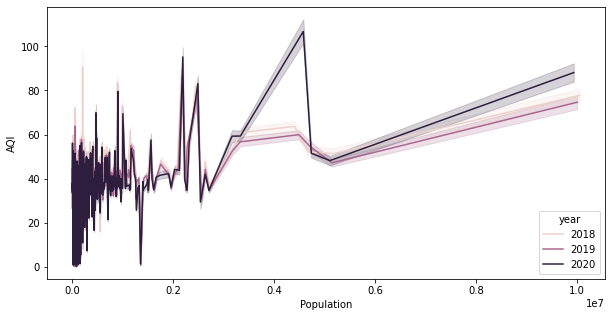

In [183]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(data=singlesite_percountyDF, x="Population", y="AQI", hue="year")

In [185]:
# sns.lineplot(data=all_merged_df, x="month", y="Good", hue="Location Setting")

In [186]:

# result = result.merge(populationInfo, how='inner', left_on=["State Code", "County Code"], right_on=["STATE", "COUNTY"])
# result.info()
# result.head()

In [187]:
# result['Population'] = 0
# for i in range(0,len(result)):
#   if result.at[i,'year'] == 2018:
#     result.at[i,'Population'] = result.at[i,'POPESTIMATE2018']

In [188]:
# result = result[['State Code', 'County Code', 'year', 'month', 'AQI', 'STNAME', 'CTYNAME', 'Population', 'Site Num']]
# result.info()

In [189]:
# result = pd.merge(result,siteInfo[['State Code', 'County Code','Site Number','Land Use', 'Location Setting']], how='inner', left_on=["State Code", "County Code", "Site Num"], right_on=["State Code", "County Code", "Site Number"])
# result.info()

In [190]:
# result = result.dropna()
# result = result.drop_duplicates()
# result.info()

In [ ]:
# result['Site Number'].value_counts()